In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# 激活函数

In [15]:
def sigmoid(x):
    return 1 / (1 + np.power(np.e, -1 * x))

# 生成训练数据

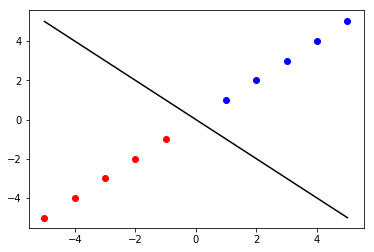

In [16]:
num_trains = 10
num_inputs = 2

x = np.array([[-1,-1], [-2,-2], [-3,-3],[-4,-4], [-5, -5],[1,1], [2,2], [3,3],[4,4], [5, 5]])
y_true = np.array([0,0,0,0,0,1,1,1,1,1]).reshape((10,1))

plt.scatter(x[:5,0], x[:5,1], c='r')
plt.scatter(x[5:,0], x[5:,1], c='b')
plt.plot([-5,-4,-3,-2,-1,1,2,3,4,5], [5,4,3,2,1,-1,-2,-3,-4,-5], c='black')

# 定义模型

In [17]:
def net(x, w):
    return x.dot(w)

# 定义梯度函数

In [18]:
def dw(y_pred, x, y, w):
    return -(x.T.dot(y - y_pred)) / len(y)
    pass

# 定义交叉熵损失函数

In [19]:
def cross_entropy(y, y_pred):
    return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / len(y)

# 模型训练

0.000972513280982
trained w b is:
[[ 3.01035171]
 [ 3.01035171]]
[[  2.42208038e-03]
 [  5.89496036e-06]
 [  1.43128186e-08]
 [  3.47509673e-11]
 [  8.43739969e-14]
 [  9.97577920e-01]
 [  9.99994105e-01]
 [  9.99999986e-01]
 [  1.00000000e+00]
 [  1.00000000e+00]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


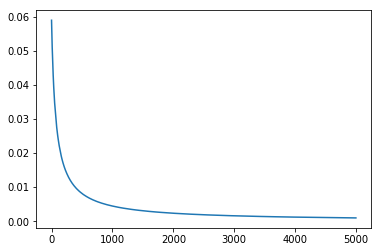

In [28]:
w = np.array([1, 1]).reshape((2, 1))

num_epochs = 5000
batch_size = 5
lr = 0.1
losses = []
for i in xrange(num_epochs):
    epoch_loss = 0
    idx = range(num_trains)
    random.shuffle(idx)
    for index in xrange(0, num_trains, batch_size):
        j = np.array(idx[index:min(index + batch_size, num_trains)])
        x_batch = x[j,:]
        #print x_batch.shape
        y_batch = y_true[j]
        y_pred = sigmoid(net(x_batch, w))
        loss = cross_entropy(y_batch, y_pred)
        epoch_loss += loss
        #print loss
        dw_batch = dw(y_pred, x_batch, y_batch, w)
        #print dw_batch.shape
        #print w.shape
        w = w - lr * dw_batch
    losses.append(epoch_loss)
plt.plot(losses)
print min(losses)
print "trained w b is:"
print w
print sigmoid(net(x, w))[:10,:]
print y_true[:10,:]